***PROJECT REPORT***

***Rating Prediction and Topic modelling on Refrigerator water filter Amazon Reviews***

# PROBLEM STATEMENT:
To do Topic modelling for bringing out topics discussed in Amazon Refrigerator water filter reviews using Latent Dirichlet Allocation. Multi Class text classification is done with various Machine learning classifiers to analyze and Visualize customer's point of view under different ratings and to predict them. Product development department can have an idea about customer's expectation on Refrigerator water filters and than they can use this model to design and create a new water filters.

***Data is Extracted from http://deepyeti.ucsd.edu/jianmo/amazon/index.html***


# DATA PREPROCESSING

## DATA CLEANING AND EDA - AMAZON APPLIANCES REVIEW

***Data Dictionery for Reviews table***


|Variable name|Description|Data type
|---|---|---|
|reviewerID|ID of the reviewer, e.g. A2SUAM1J3GNN3B|object|
|asin|ID of the product, e.g. 0000013714|object|
|reviewerName|name of the reviewer|object|
|vote|helpful votes of the review|object|
|style|a disctionary of the product metadata, e.g., "Format" is "Hardcover"|object|
|reviewText|text of the review|object|
|overall|rating of the product|float|
|summary|summary of the review|object|
|unixReviewTime|time of the review (unix time)|int|
|reviewTime|time of the review (raw)|object|
|image|image|object|
|verified|filter verification|boolean|

- There are total of 602,777 reviews

- Rating are classified into 5 categories based on the sentiments

- Choose Verified reviews for modelling and it is about 563870 reviews

- Dropped image and verified columns

- From reviewTime column, month and year column is extracted

- Reviews per year

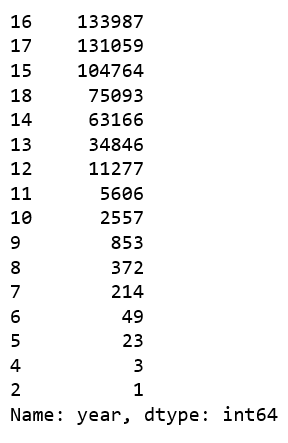

- The above numbers also have the count of other appliances other than water filter

- We could see year by year reviews increases. 2018 reviews are incomplete.

- Choosing year greater than 2012 for topic modelling. More reviews are taken for topic modelling compared to text classification to get topics without overlap.

- Only 4 years considered for rating classification as rating 5 is significantly greater than any other rating with increase in years. This results in classification of most of the reviews as Rating 5 as the data is imbalanced.To prevent that we limit the number of years to 4, which also gives enough reviews for the prediction.

- As we have a big data more than what the computer can handle, we limit the reviews per water filter to greater than 500.

## DATA CLEANING - AMAZON APPLIANCES PRODUCT DETAILS

***Data Dictionary for Amazon appliances product details***

|Variable name|Description|Data type|
|---|---|---|
|category|product category|object|
|description|product description|object|
|title|product name|object|
|also_buy|other products that customer buy|object|
|brand|brand of the product|object|
|rank|product ranking|object|
|also_view|other products that customer view|object|
|main_cat|main product category|object|
|price|product price|object|
|asin|amazon product id|object|
|tech1|technical details of the product|object|
|image|product image|object|
|date|date at which the product details are extracted|object|
|feature|product features|object|
|similar_item|item similar to the product|object|
|details|product details|object|
|tech2|technical details of the product|object|


- Filtering product title with 'Refrigerator Water Filter' in it

- dropped the columns 'also_buy','also_view','similar_item','image','tech2','details'

- created month column and year column from the date column

- sorted the dataframe by year and than by month to extract the unique product detail after dropping the old details about the water filter.

## MERGING REVIEWS AND PRODUCT DETAILS AND CLEANING

- merging the above 2 dataframes and got the product details for the water filter reviews with more than 500 reviews per water filter.

- Reviews under each water filter rating

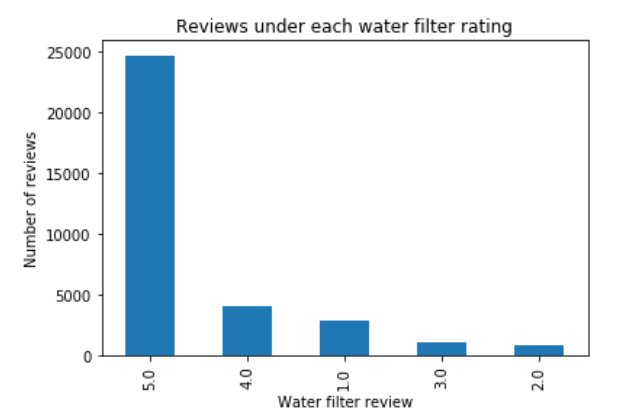

***The data is imbalanced and the prediction mostly shows the neighbour classes as the words used in between neighbour classes are similar*** 

- The rating 2,3,4 are grouped together to improve accuracy and also the ratings are quite similar and difficult to interpret under the correct rating

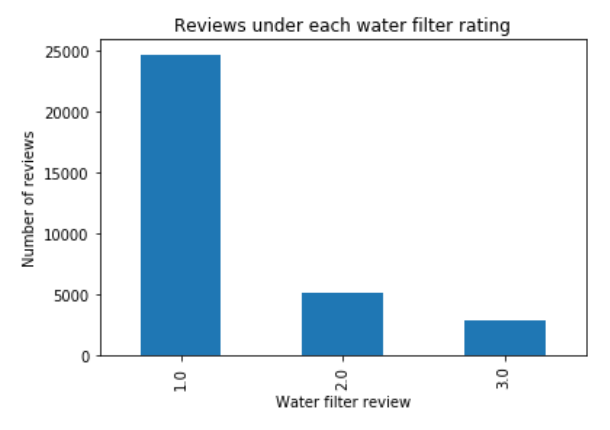

***Even now the ratings are imbalanced but better than before***

- Number of reviews under each class

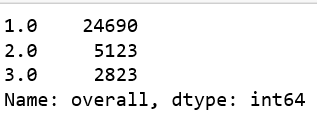

- Dropped unnecessary columns and kept only ['asin','title','tech1','reviewText','overall','reviewerID',
  'reviewTime','year','month']

## CONVERTING WORDS INTO CORPUS

- Describing our own stopwords to avoid some of the negative words like 'not' from being stopped

- Steps involved in creating corpus and encoding the corpus
  * Regex used to extract words
  * Lower case conversion
  * Spacy Lemma used to Lemmatize
  * NLTK stemming used for stemming
  * Bigram and Trigrams are created
  * Postags-noun, adverb, adjective,verb - Topic Modelling
  * Gensim simple preprocess used for cleaning - Topic modelling
  * Count Vectorizer and TFIDF Vectorizer used to vectorize - Rating prediction
  * doc2bow encoding used to encode - Topic modelling
  * Gensim bigram and trigram - Topic modelling
  * corpora.Dictionary - used to create dictionary for topic modelling



# EXPLORATORY DATA ANALYSIS

- As class 1, 2, 3 is not clear enough we give them a name good, average, bad respectively

- Top Words in the 3 classes

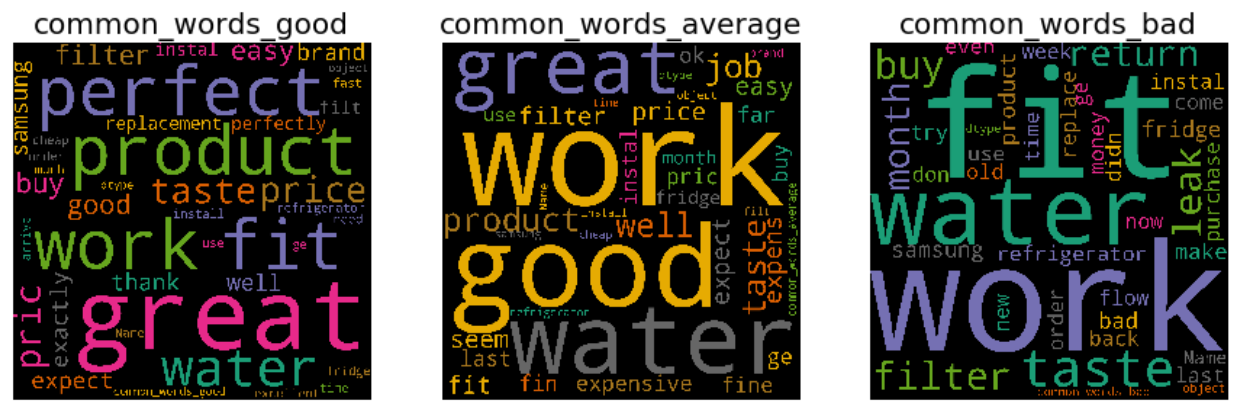

- Good reviews have more positive words like great, perfect, work, fit etc
- Average reviews have top words like good and also great, work, expensive
- bad reviews have words like leak, bad, didn, return apart from fit work

# MODELLING

## TEXT CLASSIFICATION

***Classifiers Used:***

- Logistics Regression
- Multinomial Bayes
- Support Vector 
- Random Forest
- Adaboost 
- Extratrees
- Voting classifier


***Techniques used to bring down the imbalance in the data and improve accuracy***

- Upsample - SMOTE()
  - System could not handle upsample. But it doesn't perform well also with small dataset.
- Downsample - NearMiss()
  - Downsample classified most of the rating as the majority class. The recall of the model is very poor with       downsample.
- PCA - Dimensionality Reduction
  - PCA has no effect on the model 


### FINAL TEXT CLASSIFICATION MODEL

- Logistics Regression using Count Vectorizer. The combination is quite dood compared to the combination of Logistics regression and TFIDF.

### MODEL EVALUATION

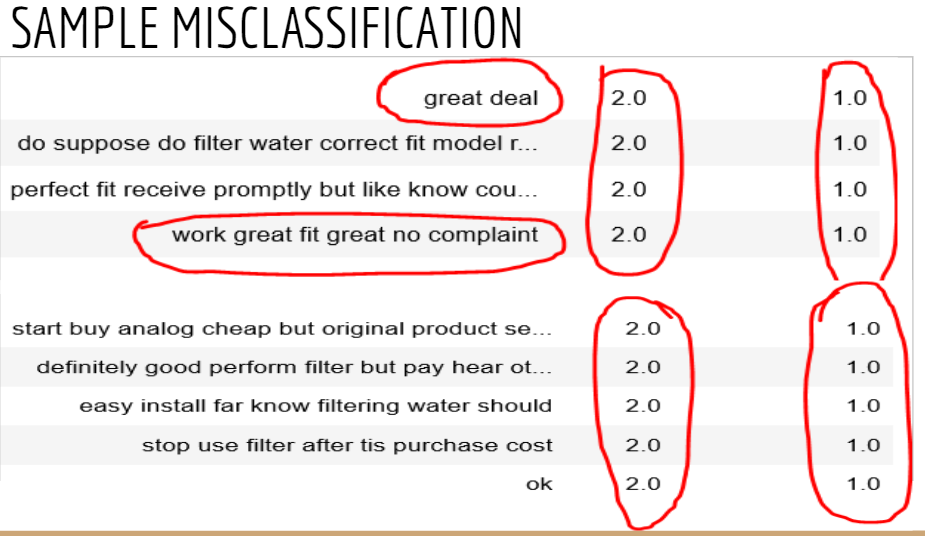

***Classification Report***

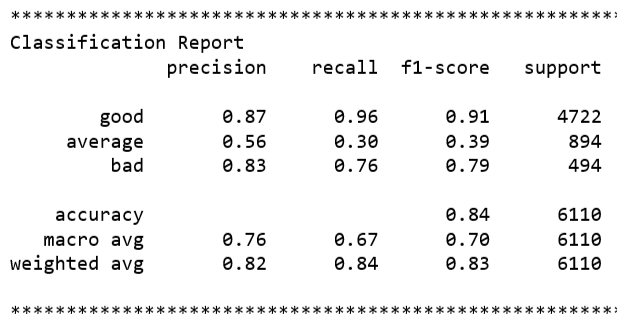

- We could see from the above classification report the precision and recall for class average is not good.

***Confusion matrix***

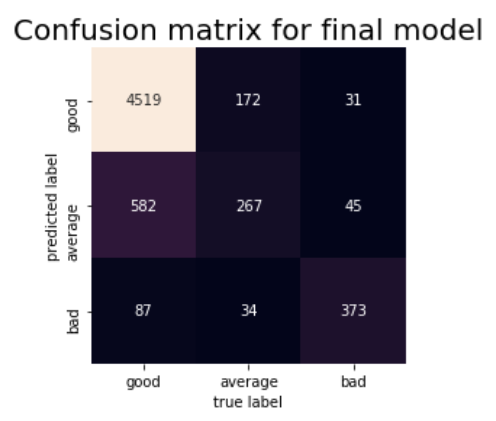

|Class|Actual|True Positive|False Positive|True Negative|False Negative|
|---|---|---|---|---|---|
|Good|5188|4519|203|640|669|
|Average|473|267|894|4892|206|
|Bad|449|373|121|4786|76|

### CONCLUSION FOR TEXT CLASSIFICATION:
- We can realize from the above table that eventhough Class Bad is the minor class it still perform well because most of the vocabulary are unique to the class, While Class Average have vocabulary similar to class good. That's why the model only have a average F1 score of 83%. 
- Also some times the rating for the reviews are not well defined. 
- words in the reviews are not clear enough to classify the rating.
- For the product development department, In design point of view from the top words we can see customers are expecting a filter without leak, good water taste, inexpensive and to work well.

## TOPIC MODELING:

- LDA topic modelling is done
   - Latent - Hidden
   - Dirichlet - Distribution
   - Allocation
- Parmeters tuned
   - Number of topics from 4 topic to 8 Topic
   - less than 4 topics doesn't give meaningful topics while more than 7 the topics are repeated
   - 5 is the best topic
   - Also Passes are adjusted until 80 to obtain good topics without overlap
   


### MODEL EVALUATION:

Evaluated using
   - Coherance score and pyLDAvis.gensim plot

***COHERANCE SCORE***

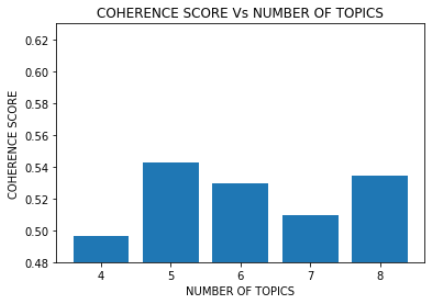

- Number of topics with maximum coherance is considered optimum Number of topics but still human like to label, we can still go with the number of topics, which can be interpreted without repeated topics.

***pyLDAvis.gensim plot***

- In this method topics should have very less overlap. Ideal case is no overlap.

***FOLLOWING SECTION HAVE VARIOUS TOPICS AND TOP 30 WORDS UNDER EACH TOPIC***

***TOPIC 1 - PERFORMANCE***

***Topic 1 and Topic 2 have some overlap because of the common frequent word filter***

***From the size of bubble we can understand that topic 1 is the dominant topic with freguent words***

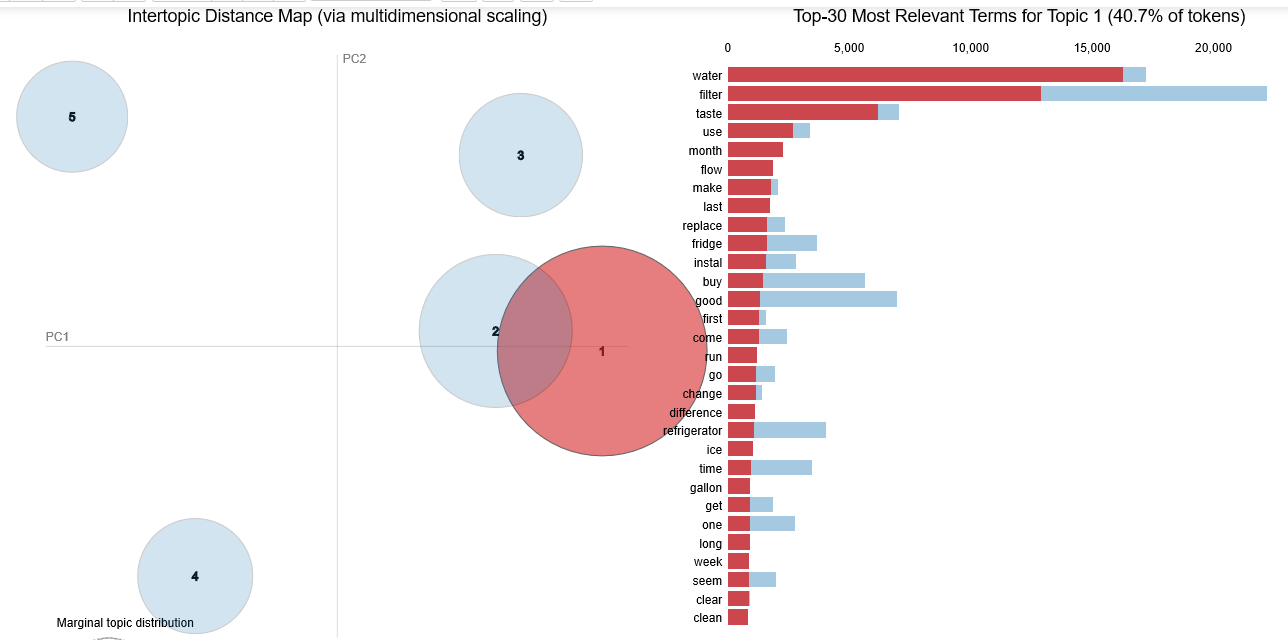

***TOPIC 2 - PRICE AND RECOMMENDATIONS***

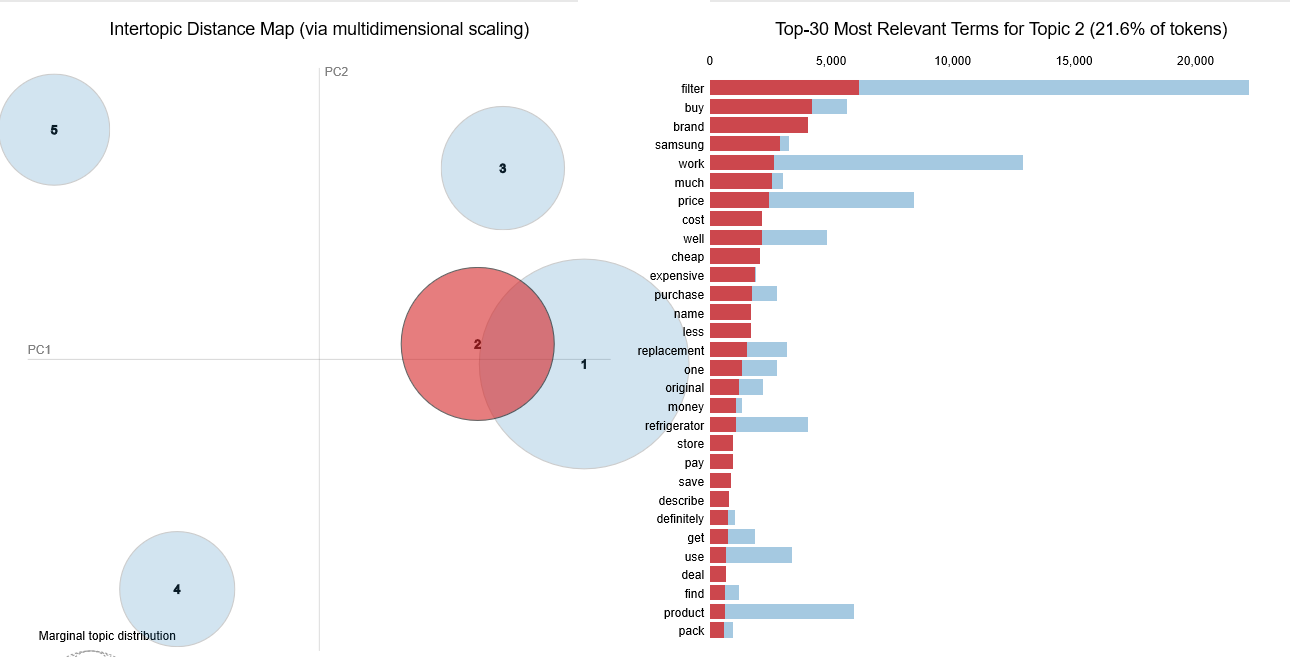

***TOPIC 3- PRODUCT DETAILS AND PROBLEM***

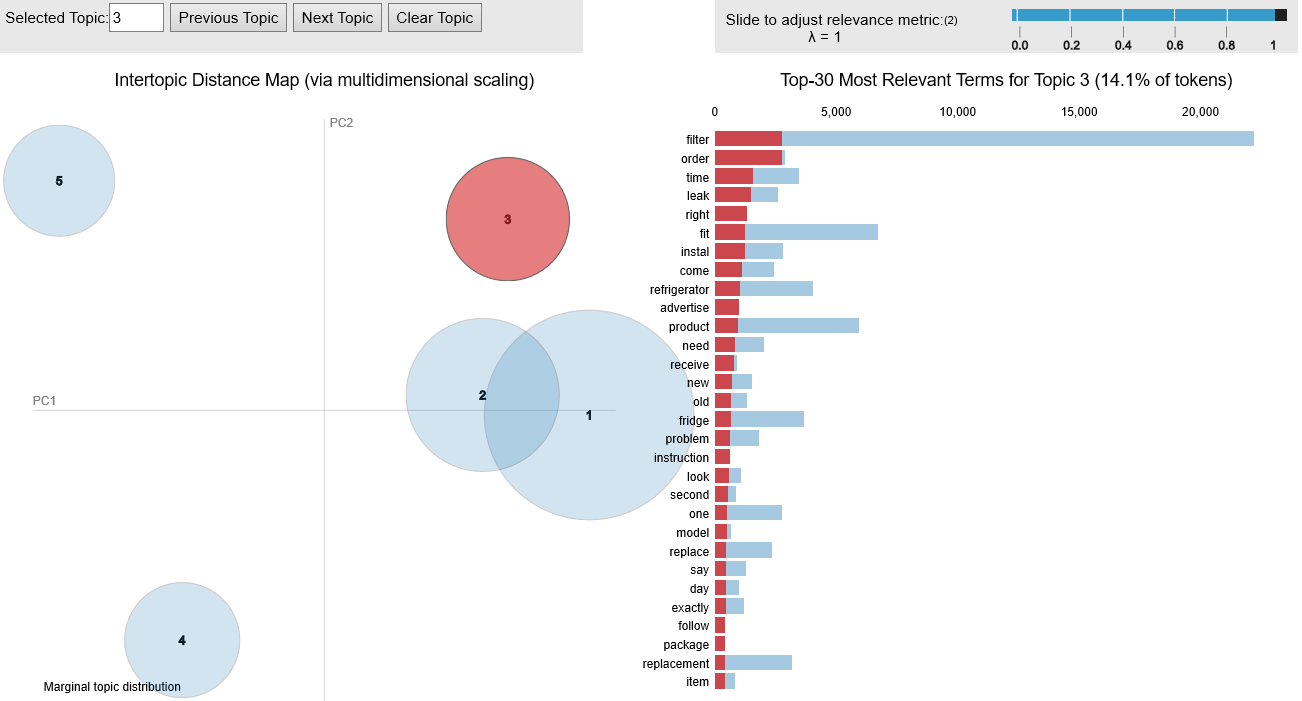

***TOPIC 4: COMPATIBILITY WITH REFRIGERATOR***

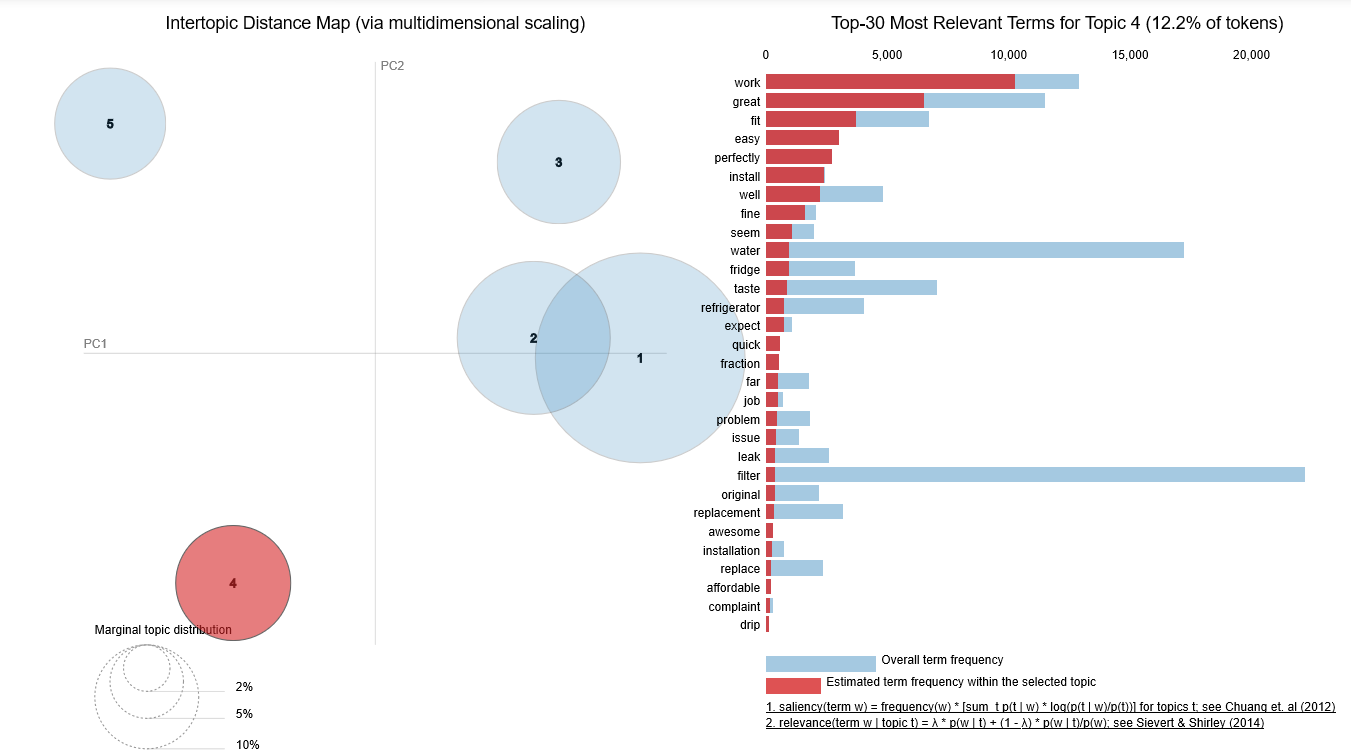

***TOPIC 5: AMAZON SERVICES***

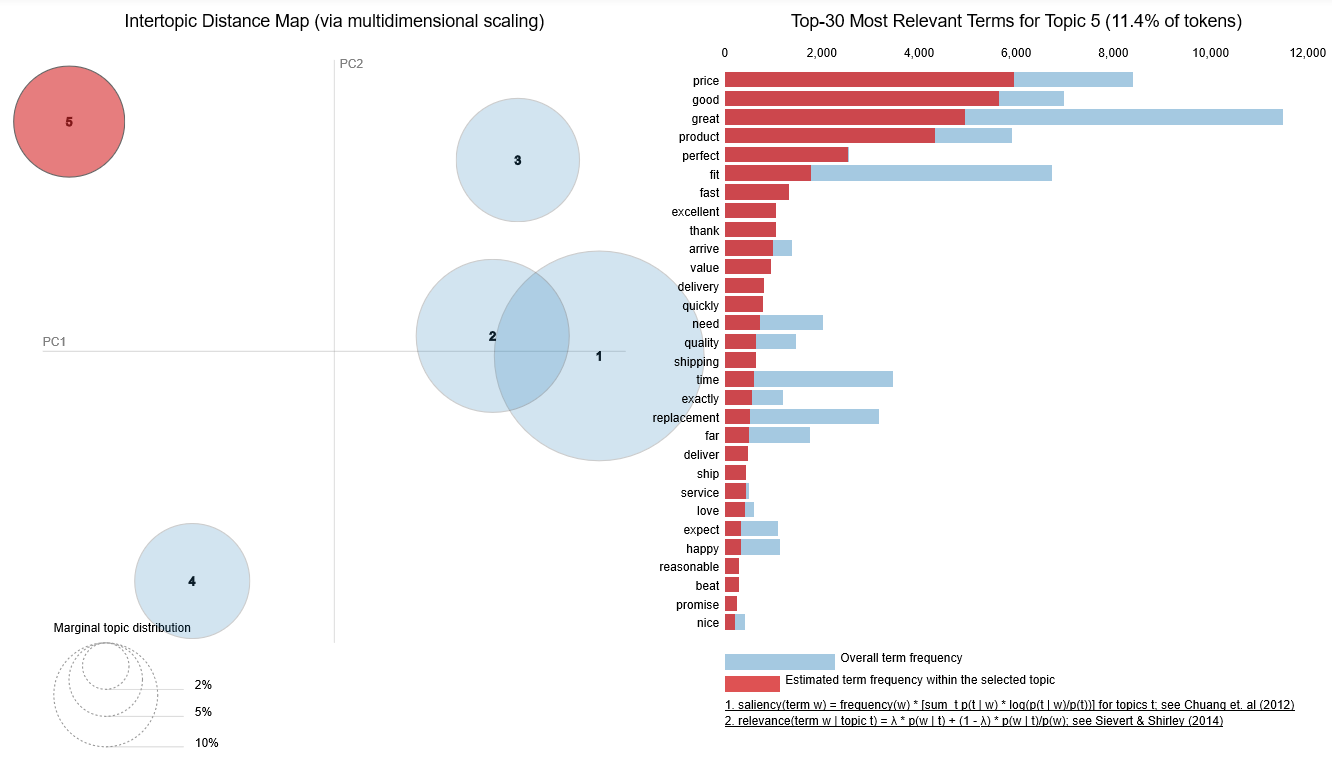

### CONCLUSION FOR TOPIC MODELLING

***CUSTOMER’S EXPECTATION FROM WATER FILTERS:***
- Clean water and ice with good taste .
- Long lasting filters and able to make more gallons of water.
- Easy to install.
- Compatibility with various Refrigerator without leak.
- Last but not least - Affordability

***TOPIC MODELLING***

***- Frequency wise Topic 0 contribute most.***

- Advantage: 
    - Able to get Good topics by tuning.
- Disadvantage:
    - Even with seed difficult to reproduce.
    - Time consuming.
